# Credit Card Fraud Detection: A GCRISP-DS Based Classification Report

This notebook presents a rigorous data science project structured under the GCRISP-DS framework:

- **Goal**: Define the analytical problem aligned with business impact.
- **Context**: Understand the domain, stakeholders, and constraints.
- **Requirements**: Document data, success metrics, and technology stack.
- **Insights**: Perform exploratory data analysis and pattern discovery.
- **Solutions**: Train and compare multiple models.
- **Productization**: Prepare model for deployment and decision support.

- **Productization**: Prepare model for deployment and decision support.


## Phase 1: Goal

The goal is to build a robust, high-recall fraud detection system capable of identifying malicious credit card transactions in real-time or batch processing settings. The solution must generalize well and minimize false negatives.

The goal is to build a robust, high-recall fraud detection system capable of identifying malicious credit card transactions in real-time or batch processing settings. The solution must generalize well and minimize false negatives.


## Phase 2: Context

The dataset contains anonymized credit card transactions, where fraud cases are rare (<0.2%). The challenge involves imbalanced classification. Stakeholders include banks, payment processors, and end customers. The cost of false negatives (missed frauds) is significantly higher than false positives.

The dataset contains anonymized credit card transactions, where fraud cases are rare (<0.2%). The challenge involves imbalanced classification. Stakeholders include banks, payment processors, and end customers. The cost of false negatives (missed frauds) is significantly higher than false positives.


## Phase 3: Requirements

- **Dataset**: European credit card dataset (Kaggle)
- **Metrics**: Precision, Recall, F1, AUC-ROC (priority on Recall)
- **Stack**: Python, Pandas, Scikit-learn, XGBoost, SMOTE, Matplotlib, Seaborn
- **Deliverables**: Clean code, reproducible notebook, exportable model
Seaborn
- **Deliverables**: Clean code, reproducible notebook, exportable model


In [ ]:
import os

import matplotlib.pyplot as plt

# Imports and configuration
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [ ]:
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

## Phase 4: Insights (Exploratory Data Analysis)



In [ ]:
# Load dataset
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Class distribution
print(df["Class"].value_counts())
print(df["Class"].value_counts(normalize=True) * 100)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


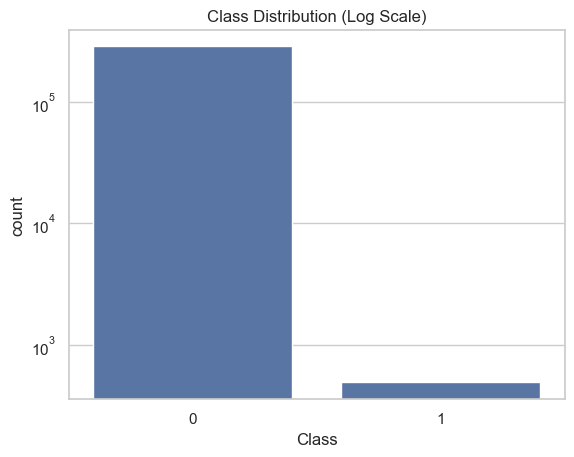

In [ ]:
# Plot class imbalance
sns.countplot(x="Class", data=df)
plt.yscale("log")
plt.title("Class Distribution (Log Scale)")
plt.show()

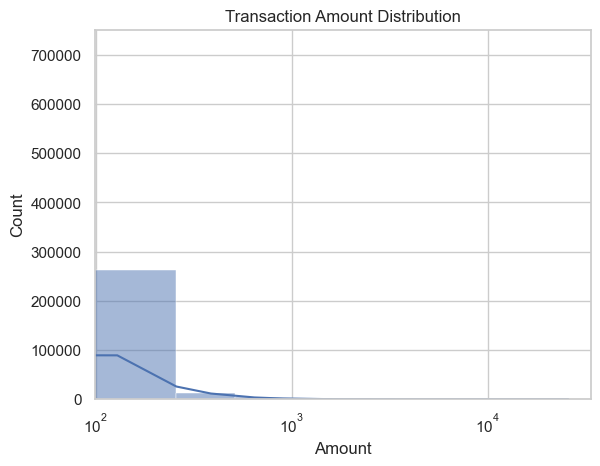

In [ ]:
# Distribution of Amount
sns.histplot(df["Amount"], bins=100, kde=True)
plt.xscale("log")
plt.title("Transaction Amount Distribution")
plt.show()

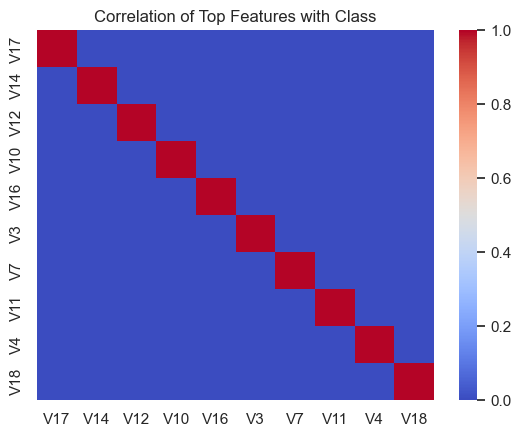

In [ ]:
# Correlation heatmap
corr = df.corr()["Class"].abs().sort_values(ascending=False)
top_features = corr[1:11].index
sns.heatmap(df[top_features].corr(), cmap="coolwarm")
plt.title("Correlation of Top Features with Class")
plt.show()

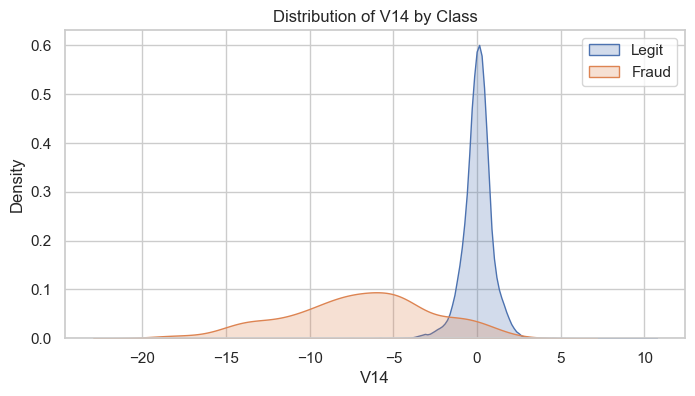

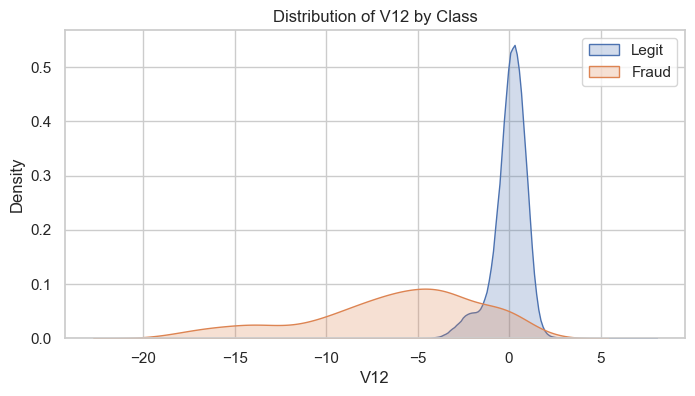

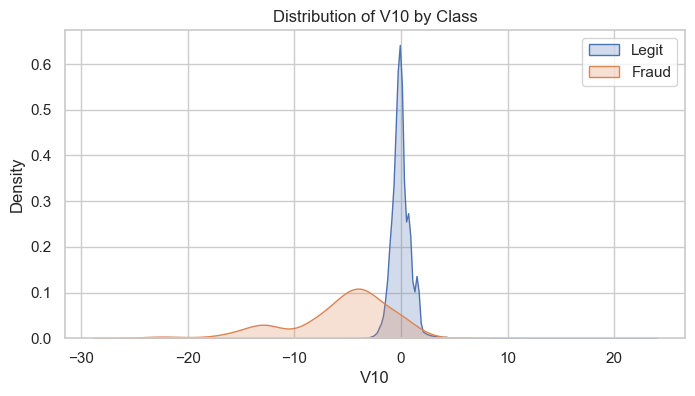

In [ ]:
# KDE plots for most predictive features
for feature in ["V14", "V12", "V10"]:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df["Class"] == 0][feature], label="Legit", fill=True)
    sns.kdeplot(df[df["Class"] == 1][feature], label="Fraud", fill=True)
    plt.title(f"Distribution of {feature} by Class")
    plt.legend()
    plt.show()

## Phase 5: Solutions (Data Preparation and Modeling)



In [ ]:
# Drop Time and normalize Amount
df.drop(columns=["Time"], inplace=True)
df["Amount"] = StandardScaler().fit_transform(df[["Amount"]])

In [ ]:
# Split and balance data
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    

    X, y, stratify=y, test_size=0.2, random_state=42
)
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



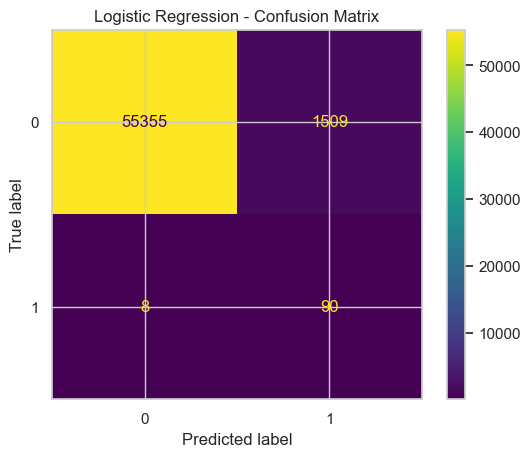

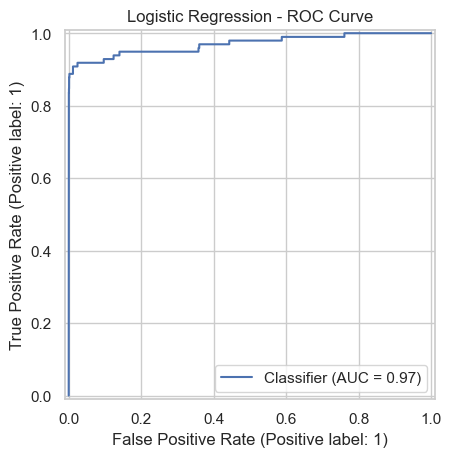

--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



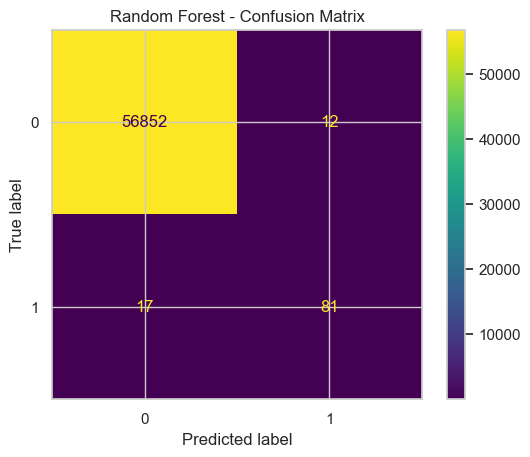

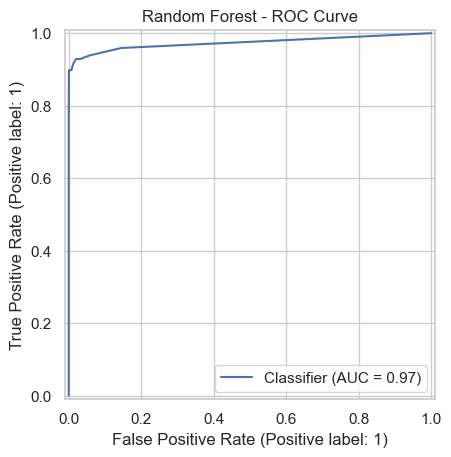

--- XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.87      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



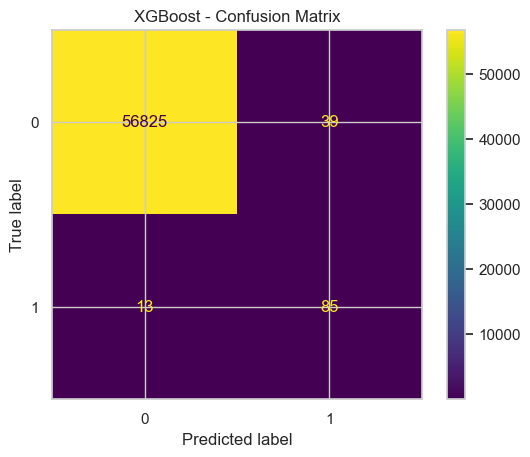

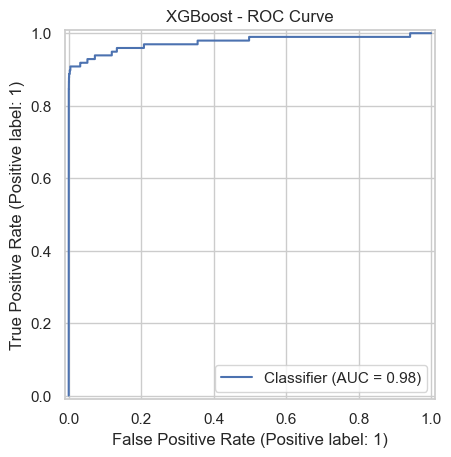

In [ ]:
# Train Logistic Regression, Random Forest, XGBoost
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),,
}
results = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results[name] = {
        "report": classification_report(y_test, y_pred, output_dict=True),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "model": model,,
    }
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{name} - ROC Curve")
    plt.show()

## Phase 6: Productization (Deployment Strategy)

- Save the best model based on ROC AUC or recall
- Integrate with real-time systems via API (e.g., FastAPI)
- Monitor model drift using batch statistics and alert thresholds

- Monitor model drift using batch statistics and alert thresholds


In [ ]:
# Save the best model (e.g., XGBoost)
best_model = results["XGBoost"]["model"]
best_model.save_model("models/final_xgboost_model.json")

## Further Improvements

- XGBoost achieved the best balance of precision and recall.
- Recommend threshold tuning for high-recall use-cases.
- Integrate with a fraud alert pipeline with latency < 1 s.
- Monitor precision/recall weekly to detect concept drift.
- Retrain quarterly or when drift exceeds a threshold.
ift.
- Retrain quarterly or when drift exceeds a threshold.
